In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import math
import numpy as np

torch.manual_seed(42)
device = 'cpu'

In [2]:
# Dados sintéticos (linear)
N = 120
x_lin = torch.linspace(-3, 3, N).unsqueeze(1)
true_w, true_b = 3.0, 2.0
noise = 0.5*torch.randn_like(x_lin)
y_lin = true_w * x_lin + true_b + noise

# Modelo
model_lin = nn.Linear(1, 1)
criterion = nn.MSELoss()
opt = torch.optim.SGD(model_lin.parameters(), lr=0.05)

loss_hist_lin = []
for epoch in range(800):
    opt.zero_grad()
    yhat = model_lin(x_lin)
    loss = criterion(yhat, y_lin)
    loss.backward()
    opt.step()
    loss_hist_lin.append(loss.item())

w_est = model_lin.weight.item()
b_est = model_lin.bias.item()
print(f"Parâmetros estimados: w={w_est:.3f}, b={b_est:.3f}")

Parâmetros estimados: w=2.994, b=2.025


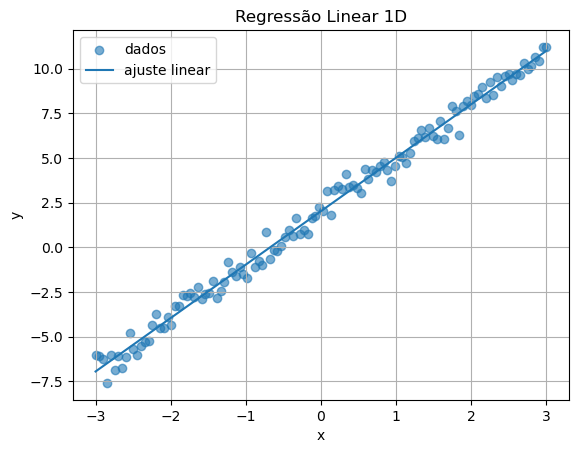

In [3]:
# Gráfico: dados vs. reta ajustada
x_plot = torch.linspace(x_lin.min(), x_lin.max(), 200).unsqueeze(1)
y_plot = model_lin(x_plot).detach()

plt.figure()
plt.scatter(x_lin.squeeze().numpy(), y_lin.squeeze().numpy(), alpha=0.6, label='dados')
plt.plot(x_plot.squeeze().numpy(), y_plot.squeeze().numpy(), label='ajuste linear')
plt.title('Regressão Linear 1D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

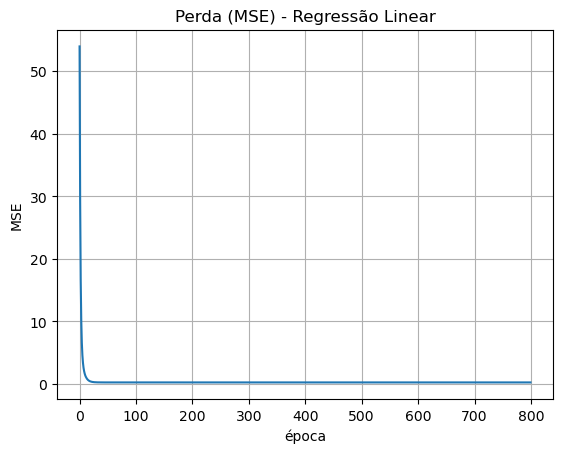

In [4]:
# Curva de perda
plt.figure()
plt.plot(loss_hist_lin)
plt.title('Perda (MSE) - Regressão Linear')
plt.xlabel('época')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [12]:
# Dados sintéticos (não linear)
N = 160
x_non = torch.linspace(-3.0, 3.0, N).unsqueeze(1)
def f_true(x):
    return torch.sin(1.5*x) + 0.5*x**2 - 0.5
y_true = f_true(x_non)
y_non = y_true + 0.2*torch.randn_like(y_true)

# Modelo MLP
model_non = nn.Sequential(
    nn.Linear(1, 64),
    nn.Tanh(),
    nn.Linear(64, 64),
    nn.Tanh(),
    nn.Linear(64, 1),
)
opt = torch.optim.Adam(model_non.parameters(), lr=0.01)
criterion = nn.MSELoss()


loss_hist_non = []
for epoch in range(2000):
    opt.zero_grad()
    yhat = model_non(x_non)
    loss = criterion(yhat, y_non)
    loss.backward()
    opt.step()
    loss_hist_non.append(loss.item())

print(f"Perda final (não linear): {loss_hist_non[-1]:.4f}")


Perda final (não linear): 0.0370


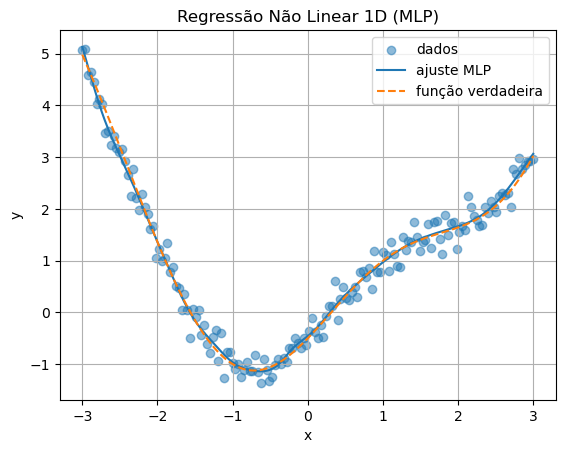

In [13]:
# Gráfico: dados vs. curva ajustada
x_plot = torch.linspace(x_non.min(), x_non.max(), 400).unsqueeze(1)
y_pred = model_non(x_plot).detach()

plt.figure()
plt.scatter(x_non.squeeze().numpy(), y_non.squeeze().numpy(), alpha=0.5, label='dados')
plt.plot(x_plot.squeeze().numpy(), y_pred.squeeze().numpy(), label='ajuste MLP')
plt.plot(x_plot.squeeze().numpy(), f_true(x_plot).squeeze().numpy(), linestyle='--', label='função verdadeira')
plt.title('Regressão Não Linear 1D (MLP)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


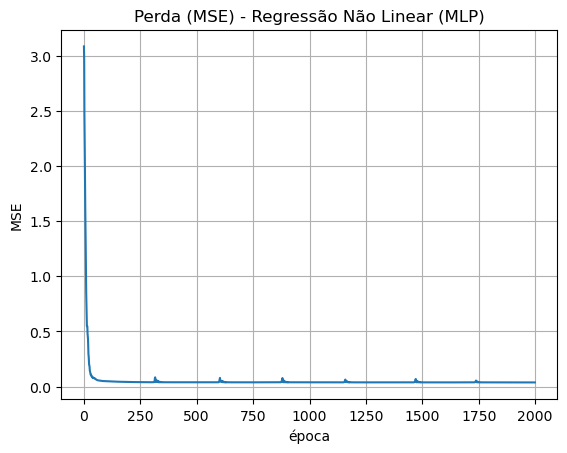

In [14]:
# Curva de perda
plt.figure()
plt.plot(loss_hist_non)
plt.title('Perda (MSE) - Regressão Não Linear (MLP)')
plt.xlabel('época')
plt.ylabel('MSE')
plt.grid(True)
plt.show()
